In [24]:
#1
import pandas as pd

df = None

#a)
cities = pd.Series(data = ["Malmö", "Stockholm", "Uppsala", "Göteborg"])
population = pd.Series(data = (347949, 975551, 233839, 583056))

df = pd.DataFrame({"Kommun": cities, "Population": population})

print(df, end = "\n\n")

#b)
gbg = df[df["Kommun"] == "Göteborg"]
print(gbg, end = "\n\n")

#c)
sorted_by_population = df.sort_values(by = "Population", ascending = False)
print(sorted_by_population,  end = "\n\n")



      Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056

     Kommun  Population
3  Göteborg      583056

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839



In [20]:
#d)

df.sort_values(by = "Population", ascending = False).iloc[0:3]

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [26]:
#e)

df["% av Sveriges population"] = df.apply(lambda row: row["Population"] / 10379295 * 100, axis = 1)

df

,Kommun,Population,% av Sveriges population
0,Malmö,347949,3.352338
1,Stockholm,975551,9.399010
2,Uppsala,233839,2.252937
3,Göteborg,583056,5.617491


In [37]:
df = pd.DataFrame({
    "Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], 
    "Population": [347949, 975551, 233839, 583056]
})

print(df["Kommun"], end = "\n\n")

print(df[df["Kommun"] == "Göteborg"], end = "\n\n")

df = df.sort_values(by = "Population", ascending = False)

print(df, end = "\n\n")

print(df.iloc[0:3])

df["% av befolkningen"] = df.apply(lambda row: row["Population"] / 10379295 * 100, axis = 1)

df

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

     Kommun  Population
3  Göteborg      583056

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


,Kommun,Population,% av befolkningen
1,Stockholm,975551,9.399010
3,Göteborg,583056,5.617491
0,Malmö,347949,3.352338
2,Uppsala,233839,2.252937


In [38]:
df = pd.read_excel("komtopp50_2020.xlsx", sheet_name = "Totalt")

df = df.iloc[6:]

df = df.rename({
    "Unnamed: 0": "Rang 2020", 
    "Unnamed: 1": "Rang 2019", 
    "Unnamed: 2": "Kommun", 
    "Unnamed: 3": "Folkmängd 2020", 
    "Unnamed: 4": "Folkmängd 2019", 
    "Unnamed: 5": "Förändring"
}, axis = "columns")

df = df.reset_index()
df = df.drop(columns = "index")

#df = df.sort_values(by = "Folkmängd 2020", ascending = False)

df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.34783
286,116,115.0,Östhammar,22251,22250.0,0.004494
287,160,159.0,Östra Göinge,15017,15007.0,0.066636
288,284,284.0,Överkalix,3289,3315.0,-0.784314


In [22]:
df["Folkmängd 2020"].sum()


10379295

<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

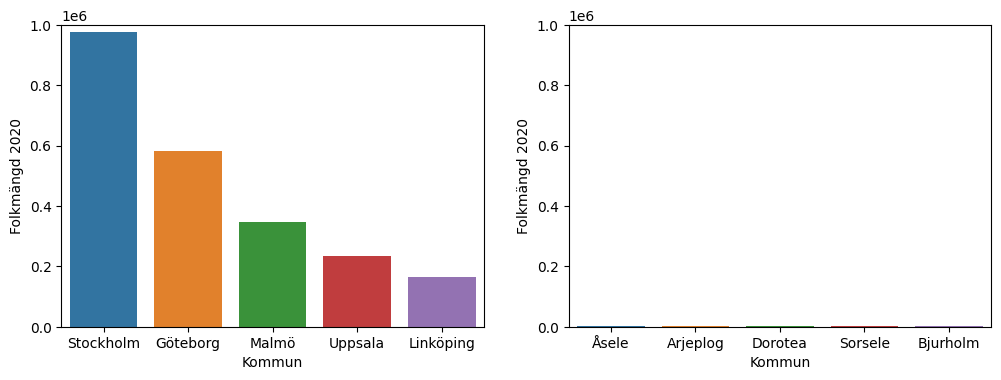

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, dpi = 100, figsize = (12, 4))

ax[0].set_ylim([0, 1000000])
ax[1].set_ylim([0, 1000000])

sns.barplot(data = df.head(), x = "Kommun", y = "Folkmängd 2020", ax = ax[0])
sns.barplot(data = df.tail(), x = "Kommun", y = "Folkmängd 2020", ax = ax[1])

In [88]:
import pandas as pd

df1 = pd.DataFrame({
    "Kolumn1": pd.Series(data = [1, 2, 3, 4, 5]),
    "Kolumn2": pd.Series(data = [9, 8, 7, 6, 5])
})

df2 = pd.DataFrame({
    "Kolumn1": [1, 2, 3, 4, 5],
    "Kolumn2": [9, 8, 7, 6, 5]
})

df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Kolumn1  5 non-null      int64
 1   Kolumn2  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Kolumn1  5 non-null      int64
 1   Kolumn2  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [2]:
import pandas as pd

cols = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]

df_males = pd.read_excel("komtopp50_2020.xlsx", sheet_name = "Män", skiprows = 6, names = cols)
df_males["Kön"] = "Man"
df_females = pd.read_excel("komtopp50_2020.xlsx", sheet_name = "Kvinnor", skiprows = 6,  names = cols)
df_females["Kön"] = "Kvinna"

df_males

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...,...,...
285,52,55,Österåker,23647,23132,2.226353,Man
286,115,115,Östhammar,11405,11447,-0.366908,Man
287,158,156,Östra Göinge,7747,7745,0.025823,Man
288,284,284,Överkalix,1730,1737,-0.402994,Man


In [60]:
import pandas as pd

males_and_females_df = pd.concat([df_males, df_females])
males_and_females_df = males_and_females_df.set_index("Kommun")

total_df = df[["Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]]
total_df = total_df.rename({"Folkmängd 2020": "Total Pop 2020", "Folkmängd 2019": "Total Pop 2019", "Förändring": "Total förändring"}, axis = 1)

tot_df = males_and_females_df.merge(total_df, on = "Kommun")
tot_df = tot_df.drop(columns = ["Rang 2020", "Rang 2019"])

tot_df = tot_df.sort_values(by = "Total Pop 2020", ascending = False)

<AxesSubplot:xlabel='Kommun', ylabel='Total Pop 2020'>

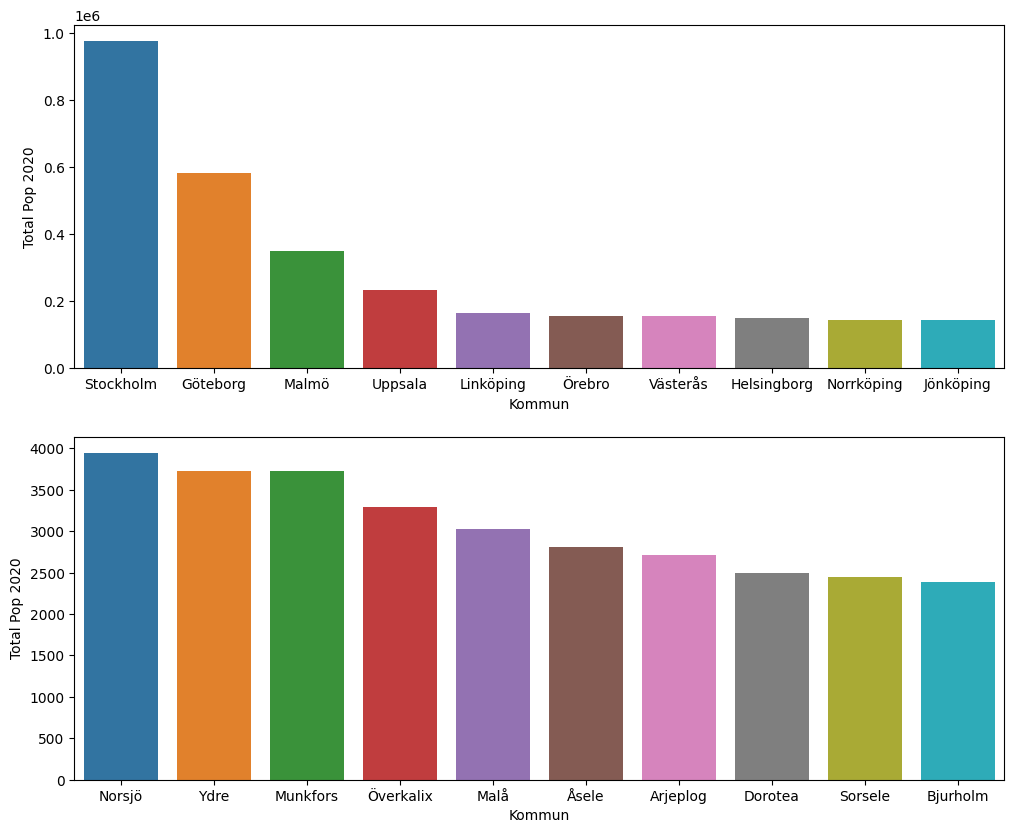

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, dpi = 100, figsize = (12, 10))

sns.barplot(data = tot_df.iloc[0:20], x = "Kommun", y = "Total Pop 2020", ax = ax[0])
sns.barplot(data = tot_df.iloc[-20:-1], x = "Kommun", y = "Total Pop 2020", ax = ax[1])

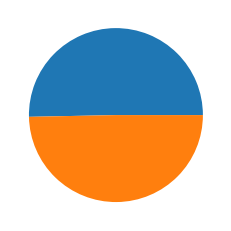

In [79]:
man = tot_df[tot_df["Kön"] == "Man"]["Folkmängd 2020"].sum()
kvinnor = tot_df[tot_df["Kön"] == "Kvinna"]["Folkmängd 2020"].sum()

plt.pie([man, kvinnor]);

In [87]:
tot_df["Ratio"] = tot_df["Folkmängd 2020"] / tot_df["Total Pop 2020"]

tot_df = tot_df.sort_values(by = "Ratio")

tot_df

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring,Ratio
343,Pajala,2778,2830,-1.837456,Kvinna,5966,6052.0,-1.421018,0.465639
59,Dorotea,1171,1195,-2.008368,Kvinna,2498,2551.0,-2.077617,0.468775
47,Bräcke,2916,2978,-2.081934,Kvinna,6181,6298.0,-1.857733,0.471768
389,Sorsele,1157,1170,-1.111111,Kvinna,2442,2489.0,-1.888309,0.473792
577,Överkalix,1559,1578,-1.204056,Kvinna,3289,3315.0,-0.784314,0.474004
...,...,...,...,...,...,...,...,...,...
576,Överkalix,1730,1737,-0.402994,Man,3289,3315.0,-0.784314,0.525996
388,Sorsele,1285,1319,-2.57771,Man,2442,2489.0,-1.888309,0.526208
46,Bräcke,3265,3320,-1.656627,Man,6181,6298.0,-1.857733,0.528232
58,Dorotea,1327,1356,-2.138643,Man,2498,2551.0,-2.077617,0.531225


<AxesSubplot:xlabel='Kommun', ylabel='Skillnad'>

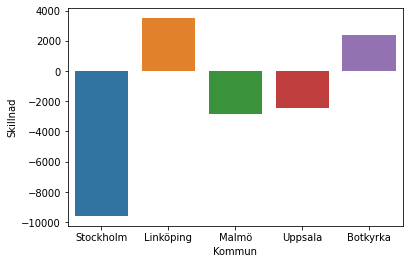

In [102]:
ratio_df = pd.DataFrame({
    "Kommun": df_males["Kommun"],
    "Skillnad": df_males["Folkmängd 2020"] - df_females["Folkmängd 2020"],
    "Skillnad abs": abs(df_males["Folkmängd 2020"] - df_females["Folkmängd 2020"])
})


ratio_df = ratio_df.sort_values(by = "Skillnad abs", ascending = False)

ratio_df

sns.barplot(data = ratio_df.iloc[:5], x = "Kommun", y = "Skillnad")